# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Azhar Anas
- **Email:** azharanas2202@gmail.com
- **ID Dicoding:** azhar_anas

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penjualan dan pendapatan perusahaan sejak perusahaan berdiri?
- Pertanyaan 2 : Metode pembayaran apa yang paling dominan digunakan oleh pelanggan?
- Pertanyaan 3 : Kota mana saja yang menjadi customer terbanyak?
- Pertanyaan 4 : (RFM Analysis) Kapan waktu transaksi terakhir yang dilakukan oleh pelanggan?
- Pertanyaan 5 : (RFM Analysis) Seberapa sering pelanggan melakukan pembelian dalam kurun waktu beberapa bulan terakhir?
- Pertanyaan 6 : (RFM Analysis) Berapa rata-rata pengeluaran pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### A. Memuat tabel customers -> `customers_df`

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### B. Memuat tabel orders -> `orders_df`

In [3]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### C. Memuat tabel ordered product -> `ordered_product_df`

In [4]:
ordered_products_df = pd.read_csv('data/order_items_dataset.csv')
ordered_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### D. Memuat tabel payment -> `payment_df`

In [5]:
payments_df = pd.read_csv('data/order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- customers_df menyimpan detail data lokasi customer
- orders_df menyimpan detail status pesanan barang dan timestamp pengiriman untuk setiap customer_id
- ordered_products_df menyimpan detail harga dan produk yang dipesan berdasarkan order_id
- payments_df menyimpan detail jenis dan total pembayaran yang dilakukan berdasarkan order_id

### Assessing Data

#### A. Menilai tabel `customers_df`

In [6]:
# Menampilkan tipe data pada masing-masing kolom
customers_df.info()

# Tipe data sudah sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
# Menampilkan jumlah missing value pada setiap kolom
customers_df.isna().sum()

# Tidak ada missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
# Menampilkan jumlah duplikasi data
print('Jumlah duplikasi: ', customers_df.duplicated().sum())

# Tidak ada data duplikat

Jumlah duplikasi:  0


In [9]:
# Menampilkan statistik deskriptif dari data
customers_df.describe()

# Tidak ada nilai data yang aneh karena data juga kebanyakan bukan data numerik yang tidak perlu dihitung secara statistik deskriptif

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### B. Menilai tabel `orders_df`

In [10]:
# Menampilkan tipe data pada masing-masing kolom
orders_df.info()

# Tipe data kolom 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date' harus diubah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
# Menampilkan jumlah missing value pada setiap kolom
orders_df.isna().sum()

# Terdapat missing value pada kolom 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
# Menampilkan jumlah duplikasi data
print('Jumlah duplikasi: ',orders_df.duplicated().sum())

# Tidak ada duplikasi data

Jumlah duplikasi:  0


In [13]:
# Menampilkan statistik deskriptif dari data
orders_df.describe()

# Tidak ada keanehan nilai pada data karena data juga kebanyakan bukan data numerik yang perlu dihitung secara statistik deskriptif

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### C. Menilai tabel `ordered_products_df`

In [14]:
# Menampilkan tipe data pada masing-masing kolom
ordered_products_df.info()

# Tipe data pada kolom 'shipping_limit_date' harus diubah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
# Menampilkan jumlah missing value pada setiap kolom
ordered_products_df.isna().sum()

# Tidak ada missing value

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
# Menampilkan jumlah duplikasi data
print('Jumlah duplikasi: ', ordered_products_df.duplicated().sum())

# Tidak ada duplikasi data

Jumlah duplikasi:  0


In [17]:
# Menampilkan statistik deskriptif dari data
ordered_products_df.describe()

# Jika melihat nilai mean, std, q1, q2, q3, nilai max pada kolom 'price' dan 'freight_value' terlalu besar, kemungkinan adanya outlier

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### D. Menilai tabel `payments_df`

In [18]:
# Menampilkan tipe data pada masing-masing kolom
payments_df.info()

# Tipe data sudah sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
# Menampilkan jumlah missing value pada setiap kolom
payments_df.isna().sum()

# Tidak ada missing value

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
# Menampilkan jumlah duplikasi data
print('Jumlah duplikasi: ', payments_df.duplicated().sum())

# Tidak ada duplikasi data

Jumlah duplikasi:  0


In [21]:
# Menampilkan statistik deskriptif dari data
payments_df.describe()

# Jika melihat nilai mean, std, q1, q2, q3, nilai max pada kolom 'payment_value' terlalu besar, kemungkinan adanya outlier

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**

`customers_df`
- Data sudah bersih

`orders_df`
- Memiliki tipe data yang salah pada kolom 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', dan 'order_estimated_delivery_date'
- Memiliki missing value pada kolom 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'

`ordered_products_df`
- Memiliki tipe data yang salah pada kolom 'shipping_limit_date'
- Memiliki kemungkinan data outlier pada kolom 'price' dan 'freight_value'

`payments_df`
- Memiliki kemungkinan data outlier pada kolom 'payment_value' 

### Cleaning Data

#### A. Membersihkan Data `orders_df`

##### 1. Menangani tipe data yang salah

In [22]:
# Mengubah tipe data menjadi datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [23]:
# Cek kembali tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### 2. Menangani Menangani Missing Value

In [24]:
# Menampilkan missing value pada berdasarkan kolom 'order_approved_at'
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [25]:
# Menampilkan missing value pada berdasarkan kolom 'order_delivered_carrier_date'
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [26]:
# Menampilkan missing value pada berdasarkan kolom 'order_delivered_customer_date'
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [27]:
# Karena banyaknya kolom data lainnya yang memiliki missing value dan dataset cukup besar, maka akan dilakukan drop data missing value
orders_df.dropna(axis=0, inplace=True)

In [28]:
# Cek kembali jumlah missing value
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### B. Membersihkan Data `ordered_products_df`

##### 1. Menangani tipe data yang salah

In [29]:
# Mengubah tipe data menjadi datetime
ordered_products_df['shipping_limit_date'] = pd.to_datetime(ordered_products_df['shipping_limit_date'])

In [30]:
# Cek kembali tipe data
ordered_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### 2. Menangani data outlier

##### 2. 1. Kolom 'price'

In [31]:
# Menghitung IQR dan batas/boundary
q1_price = (ordered_products_df['price']).quantile(0.25)
q3_price = (ordered_products_df['price']).quantile(0.75)
iqr_price = q3_price - q1_price
 
maximum_bound_price = q3_price + (1.5*iqr_price)
minimum_bound_price = q1_price - (1.5*iqr_price)
 
lower_bound_price = ordered_products_df['price'] < minimum_bound_price
upper_bound_price = ordered_products_df['price'] > maximum_bound_price

In [32]:
# Outlier yang kurang dari batas bawah
ordered_products_df[lower_bound_price]

# Tidak ada outlier yang kurang dari batas bawah

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [33]:
# outlier melebihi dari batas atas
ordered_products_df[upper_bound_price]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34
26,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.00,24.65
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29
...,...,...,...,...,...,...,...
112586,ffdc5e3279114c523a09296f8fd28331,1,5e70a4508abd5d19bfe7f110785294c8,328acb143b4a73aad6bee8e734f5d20d,2017-02-14 14:49:23,299.99,17.80
112592,ffde92ba447b33a47d1c04d203f10f41,1,a97cd00f5c1dbfbc7f0f4b6c1032253e,b347677812ea483b0f528eaf8cbc09b7,2017-11-30 14:13:18,278.00,26.70
112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.00,20.91
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41


In [34]:
# Menghapus data outlier
ordered_products_df.drop(ordered_products_df[upper_bound_price].index, inplace=True)

##### 2. 2. Kolom 'freight_value'

In [35]:
# Menghitung IQR dan batas/boundary
q1_freight_value = (ordered_products_df['freight_value']).quantile(0.25)
q3_freight_value = (ordered_products_df['freight_value']).quantile(0.75)
iqr_freight_value = q3_freight_value - q1_freight_value
 
maximum_bound_freight_value = q3_freight_value + (1.5*iqr_freight_value)
minimum_bound_freight_value = q1_freight_value - (1.5*iqr_freight_value)
 
lower_bound_freight_value = ordered_products_df['freight_value'] < minimum_bound_freight_value
upper_bound_freight_value = ordered_products_df['freight_value'] > maximum_bound_freight_value

In [36]:
# Outlier yang kurang dari batas bawah
ordered_products_df[lower_bound_freight_value]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.00
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.00
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.00
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
...,...,...,...,...,...,...,...
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.00
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.00
112002,fe6c4a42298295647106b42549a98eea,2,b917d488bd4ad4225f8d046a32e2d122,fa1a9dec3a9940c072684a46728bf1fc,2017-06-15 06:35:08,20.9,1.86
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.00


In [37]:
# outlier melebihi dari batas atas
ordered_products_df[upper_bound_freight_value]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
22,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,2018-03-21 11:10:11,119.99,44.40
59,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11
73,002b430ff89b3a24c31a1170acbbedea,1,cc47c0863559499f01b4cad750929d10,7a67c85e85bb2ce8582c35f2203ad736,2017-06-26 22:10:14,199.99,65.56
78,002f16b7bc4530031b7d90f791b12d8a,1,d54c5b81fc2b38707588dd4eddc7c594,0241d4d5d36f10f80c644447315af0bd,2018-07-04 17:11:12,249.90,34.23
80,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57
...,...,...,...,...,...,...,...
112637,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.90,44.02
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [38]:
# Menghapus data outlier
ordered_products_df.drop(ordered_products_df[lower_bound_freight_value].index, inplace=True)
ordered_products_df.drop(ordered_products_df[upper_bound_freight_value].index, inplace=True)

C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\2468473995.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordered_products_df.drop(ordered_products_df[upper_bound_freight_value].index, inplace=True)


In [39]:
# Cek kembali hasil statistik deskriptif
ordered_products_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,93975.000000,93975,93975.000000,93975.000000
mean,1.202373,2018-01-05 12:27:56.270454784,79.191667,15.751864
min,1.000000,2016-09-19 00:15:34,0.850000,2.240000
25%,1.000000,2017-09-18 20:42:50.500000,35.700000,12.660000
50%,1.000000,2018-01-24 17:07:28,60.600000,15.350000
75%,1.000000,2018-05-09 12:54:57,109.900000,18.370000
max,21.000000,2020-02-05 03:30:51,277.000000,30.410000
std,0.709123,NaN,55.980034,5.113773


#### C. Membersihkan Data `payments_df`

##### 1. Menangani data outlier

In [40]:
# Menghitung IQR dan batas/boundary
q1_payment_value = (payments_df['payment_value']).quantile(0.25)
q3_payment_value = (payments_df['payment_value']).quantile(0.75)
iqr_payment_value = q3_payment_value - q1_payment_value

maximum_bound_payment_value = q3_payment_value + (1.5*iqr_payment_value)
minimum_bound_payment_value = q1_payment_value - (1.5*iqr_payment_value)

lower_bound_payment_value = payments_df['payment_value'] < minimum_bound_payment_value
upper_bound_payment_value = payments_df['payment_value'] > maximum_bound_payment_value

In [41]:
# Outlier yang kurang dari batas bawah
payments_df[lower_bound_payment_value]

# Tidak ada outlier yang kurang dari batas bawah

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [42]:
# Outlier melebihi dari batas atas
payments_df[upper_bound_payment_value]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
23,4d680edbaa7d3d9bed69532957368a03,1,credit_card,10,353.09
26,d0a945f85ba1074b60aac97ade7e240e,1,credit_card,2,541.00
52,2e2c60b99754ae1e4d8b18846cfec9f2,1,credit_card,4,542.66
54,95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98
61,3ab4eea6776259ae8dfbabaeffece352,1,credit_card,8,387.80
...,...,...,...,...,...
103814,df8ab61cb615d551483618533aceb364,1,credit_card,10,713.65
103843,262bf694d9c87de7844dd80b98fcfef3,1,credit_card,5,372.08
103861,691688405bcee3ff9023639514498962,1,credit_card,1,356.53
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31


In [43]:
# Menghapus data outlier
payments_df.drop(payments_df[upper_bound_payment_value].index, inplace=True)

In [44]:
# Cek kembali hasil statistik deskriptif
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,95905.000000,95905.000000,95905.000000
mean,1.099546,2.628320,110.062133
std,0.734353,2.451581,72.785054
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.200000
75%,1.000000,3.000000,150.580000
max,29.000000,24.000000,344.340000


**Insight:**

`customers_df`
- Tidak dilakuan data cleaning karena data sudah bersih

`orders_df`
- Mengubah tipe data pada kolom 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', dan 'order_estimated_delivery_date' menjadi datetime
- Menghapus missing value pada kolom 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'

`ordered_products_df`
- Mengubah tipe data pada kolom 'shipping_limit_date' menjadi datetime
- Menghapus outlier pada kolom 'price' dan 'freight_value'

`payments_df`
- Menghapus outlier pada kolom 'payment_value' 

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [45]:
# Menampilkan jumlah customer berdasarkan kota
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

# 3 kota dengan jumlah customer terbanyak berada di kota Sao Paulo, Rio de Janeiro, dan Belo Horizonte

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Explore `orders_df`

In [46]:
# Menampilkan data orders yang memiliki 'order_status' delivered saja
orders_df = orders_df[orders_df.order_status == 'delivered']

In [47]:
# Menambahkan kolom baru 'delivery_time_day' yang berisi lama pengiriman dalam satuan hari
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time_day'] = round(delivery_time/86400)

orders_df.describe(include='all')

# Rata-rata lama pengiriman adalah 12 hari, dengan minimal selama 1 hari, dan maksimal 210 hari

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day
count,96455,96455,96455,96455,96455,96455,96455,96455,96455.000000
unique,96455,96455,1,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 00:26:23.673806336,2018-01-02 10:43:03.401710592,2018-01-05 05:53:41.200134656,2018-01-14 13:49:28.328526336,2018-01-25 18:04:03.421284864,12.516510
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-14 09:39:02.500000,2017-09-14 14:42:23,2017-09-18 17:06:18.500000,2017-09-25 22:56:47,2017-10-05 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-20 20:00:12,2018-01-22 13:49:24,2018-01-24 16:28:58,2018-02-02 19:52:30,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:53:33,2018-05-06 10:52:57.500000,2018-05-08 14:34:30,2018-05-15 23:09:15.500000,2018-05-28 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000


### Explore `payments_df`

In [48]:
payments_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

# Metode pembayaran terbanyak adalah menggunakan credit_card, boleto, dan voucher

payment_type
credit_card    70031
boleto         18504
voucher         3792
debit_card      1443
not_defined        3
Name: order_id, dtype: int64

### Explore `orders_df` dan `customers_df`

In [49]:
# Menambahkan kolom 'status' pada customers_df yang berisi 'Active' jika customer melakukan transaksi minimal 1 kali dan 'Non Active' jika tidak sama sekali
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active')
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
97179,f8ea9a3f142e872b1e796bd1e809dd73,25463d3b7b5fcd0499f84d2602216e72,1311,sao paulo,SP,Active
9505,cd4fa374324cf1ea4103aa4ac082440b,3728af44e90137390d9128147469bfad,21235,rio de janeiro,RJ,Active
33195,3edf1142901dcc868ace8ad17460326e,4e68e8b99664973fbc6b833838272bdc,11030,santos,SP,Active
96554,c54654905b64815899f7124f5c26f194,aff6957885833ad8da7dc66469836773,14390,santo antonio da alegria,SP,Active
33911,14eb7a65dda3e17554d653b786db01ae,a9bb8f5e3614e5e4976bea85a645a0ba,74620,goiania,GO,Active


In [50]:
customers_df.groupby(by='status').customer_id.count()

# Jumlah customer yang aktif cukup banyak yakni 96455 dari total 99441 customer atau sekitar 97%

status
Active        96455
Non Active     2986
Name: customer_id, dtype: int64

In [51]:
# Left join orders_df dengan customers_df berdasarkan kolom 'customer_id'
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [52]:
# Menampilkan 10 kota dengan jumlah order terbanyak
orders_customers_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15043
1,rio de janeiro,6600
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


### Explore `orders_df`, `customers_df`, dan `payments_df`

In [53]:
# Left join orders_df dengan customers_df berdasarkan kolom 'customer_id'
orders_customers_payments_df = pd.merge(
    left=orders_customers_df,
    right=payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orders_customers_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,1.0,credit_card,3.0,179.12


In [54]:
# Terdapat missing value setelah left join merge berdasarkan order_id
orders_customers_payments_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
delivery_time_day                   0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
status                              0
payment_sequential               7500
payment_type                     7500
payment_installments             7500
payment_value                    7500
dtype: int64

In [55]:
# Hapus missing value
orders_customers_payments_df.dropna(axis=0, inplace=True)

In [56]:
# Menampilkan jumlah customer berdasarkan metode pembayarannya
orders_customers_payments_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_type,order_id
0,credit_card,68086
1,boleto,17953
2,voucher,3624
3,debit_card,1405


### Explore `all_df`

In [57]:
# Left join orders_df dengan customers_df berdasarkan kolom 'customer_id'
all_df = pd.merge(
    left=orders_customers_payments_df,
    right=ordered_products_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [58]:
# Terdapat missing value setelah left join merge berdasarkan order_id
all_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
delivery_time_day                    0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
status                               0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                    10194
product_id                       10194
seller_id                        10194
shipping_limit_date              10194
price                            10194
freight_value                    10194
dtype: int64

In [59]:
# Hapus missing value
all_df.dropna(axis=0, inplace=True)

In [60]:
# Menampilkan gambaran terkait total pengeluaran customer (price=harga barang, freight_value=biaya ongkir, payment_value=total harga) berdasarkan metode pembayaran di setiap kota
all_df.groupby(by=['customer_city', 'payment_type']).agg({
    'price': 'sum',
    'freight_value': 'sum',
    'payment_value': 'sum'
})

price  freight_value  payment_value
customer_city       payment_type                                      
abadia dos dourados boleto         39.90          18.38          58.28
                    credit_card   319.00          36.22         355.22
abaete              boleto        281.97          56.31         338.28
                    credit_card   866.84         120.57         987.41
abaetetuba          credit_card   255.61          28.05         283.66
...                                  ...            ...            ...
xique-xique         boleto        138.80          33.98         172.78
                    credit_card    40.99          16.79          57.78
zacarias            credit_card   198.80          31.05         229.85
ze doca             boleto         39.90          26.61          66.51
zortea              credit_card    99.80          37.77         137.57

[6335 rows x 3 columns]

In [61]:
# Export all_df sebagai all_data.csv ke dashboard/data
all_df.to_csv("dashboard/main_data.csv", index=False)

**Insight:**
- Mendapatkan Informasi kota-kota dengan jumlah customer terbanyak
- Mendapatkan Informasi lama pengirimian barang
- Mendapatkan informasi jumlah metode pembayaran terbanyak
- Mendapatkan informasi total pengeluaran customer berdasarkan metode pembayaran di setiap kota

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan dan pendapatan perusahaan sejak perusahaan berdiri?

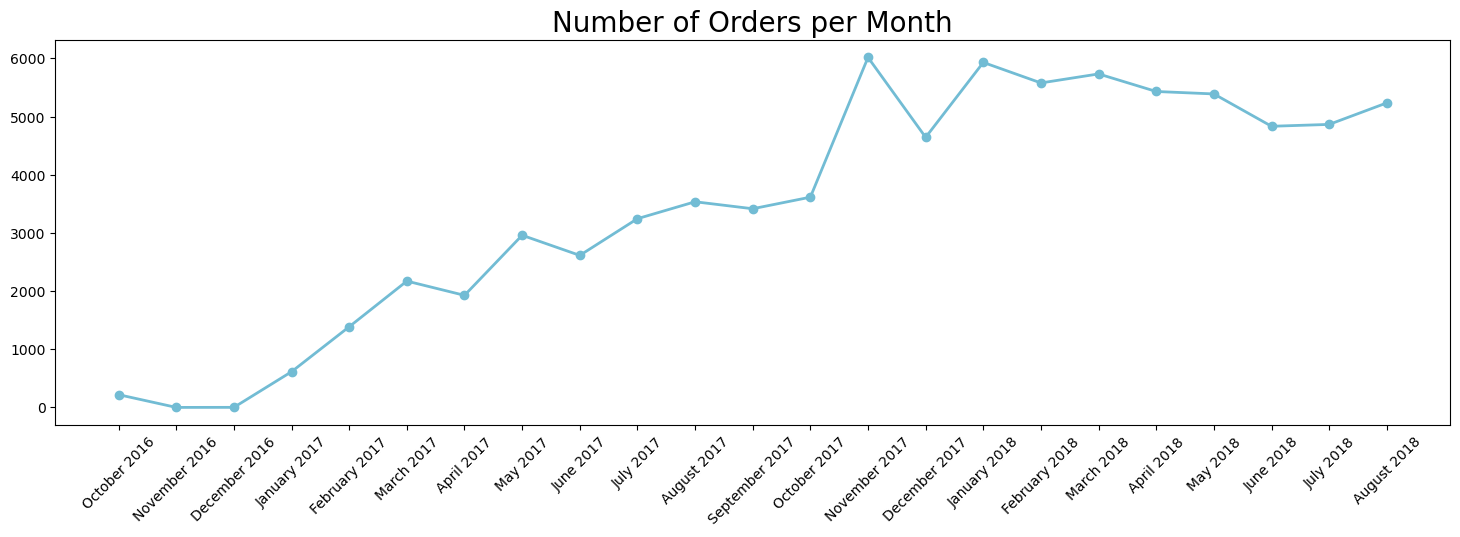

In [62]:
# Membuat total_orders_df yang berisi total order, total revenue, dan total customer berdasarkan bulan dan tahun
total_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'price': 'sum'
})
total_orders_df.index = total_orders_df.index.strftime('%B %Y')
 
total_orders_df = total_orders_df.reset_index()
total_orders_df.rename(columns={
    'order_id': 'order_count',
    'price': 'revenue'
}, inplace=True)
 
total_orders_df

# Membuat visualisasi total order per bulan
plt.figure(figsize=(18, 5))
plt.plot(total_orders_df['order_purchase_timestamp'], total_orders_df['order_count'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Number of Orders per Month', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

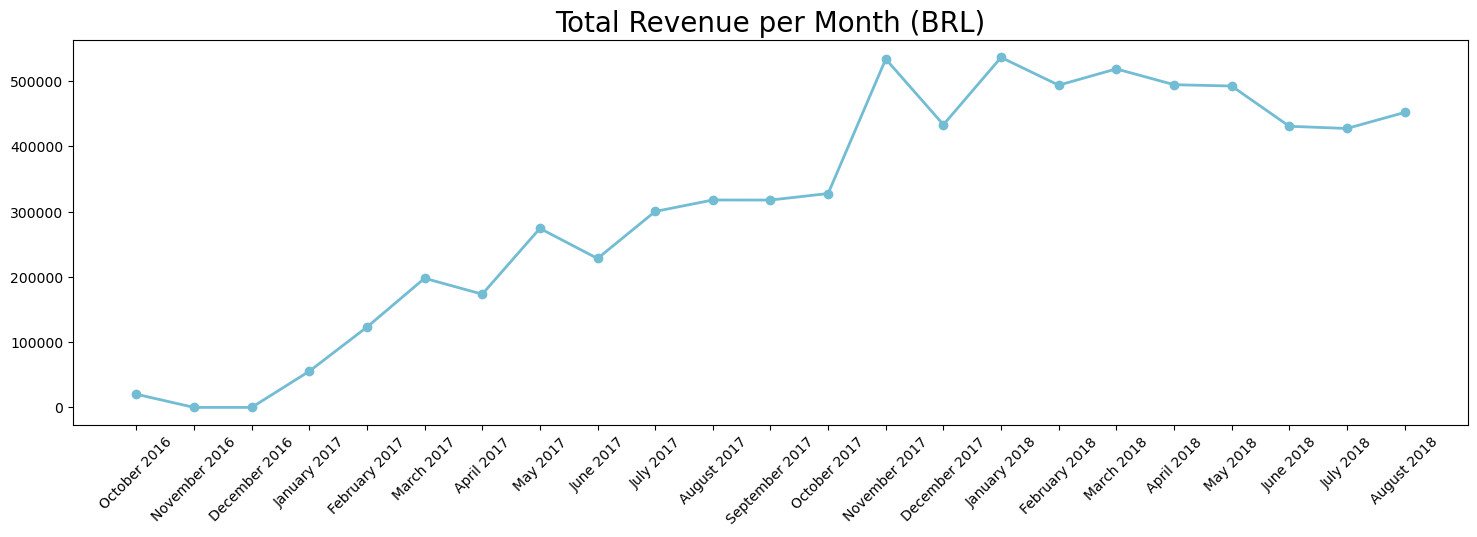

In [63]:
# Membuat visualisasi total revenue/pendapatan per bulan
plt.figure(figsize=(18, 5))
plt.plot(
    total_orders_df['order_purchase_timestamp'],
    total_orders_df['revenue'],
    marker='o', 
    linewidth=2,
    color='#72BCD4'
)
plt.title('Total Revenue per Month (BRL)', loc='center', fontsize=20) # Asumsi satuan harga menggunakan BRL (Brazilian Real) karena data nama-nama kota berasal dari Brazil
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Metode pembayaran apa yang paling dominan digunakan oleh pelanggan?

C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\3027206336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\3027206336.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


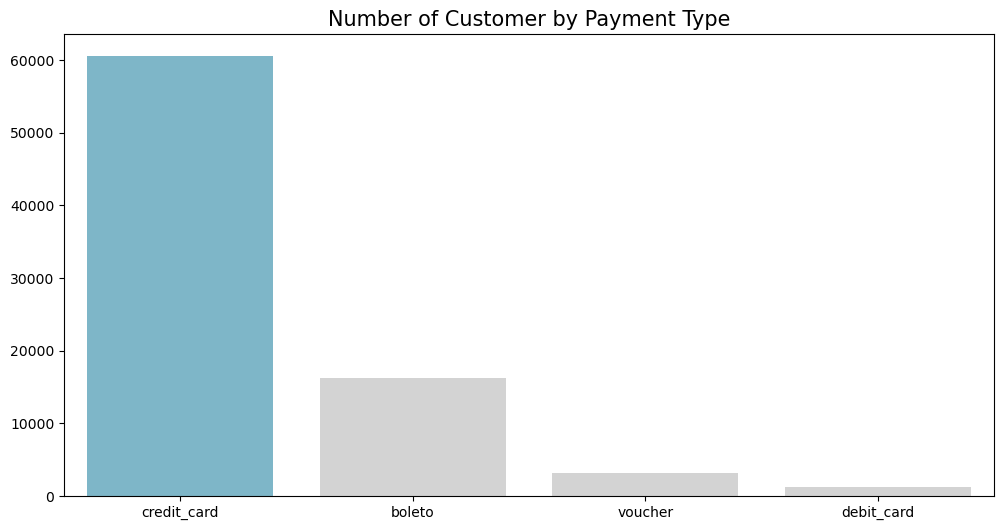

In [64]:
bypayment_type_df = all_df.groupby(by='payment_type').customer_id.nunique().reset_index()
bypayment_type_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
bypayment_type_df.sort_values(by='customer_count', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
colors_ = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(
    x='payment_type',
    y='customer_count',
    data=bypayment_type_df.head().sort_values(by='customer_count', ascending=False),
    palette=colors_
)
plt.title('Number of Customer by Payment Type', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Pertanyaan 3: Kota mana saja yang menjadi customer terbanyak?

C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\1579099229.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\1579099229.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


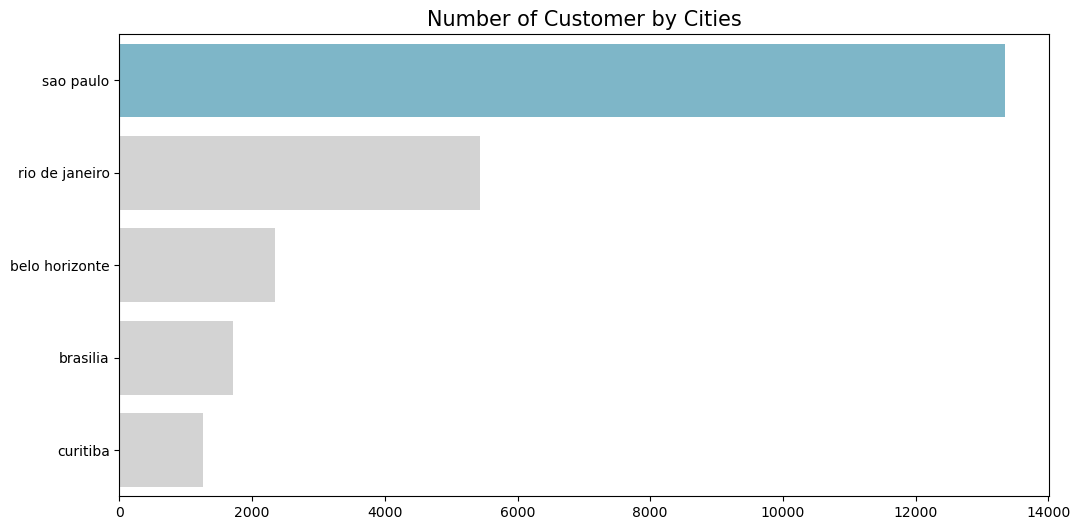

In [65]:
# Menampilkan 10 kota dengan jumlah customer terbanyak menggunakan bar chart horizontal
bycity_df = all_df.groupby(by='customer_city').customer_id.nunique().reset_index()
bycity_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
bycity_df.sort_values(by='customer_count', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
colors_ = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(
    x='customer_count',
    y='customer_city',
    data=bycity_df.head().sort_values(by='customer_count', ascending=False),
    palette=colors_
)
plt.title('Number of Customer by Cities', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

**Insight:**
- Tren penjualan dan pendapatan mengalami kenaikan dari waktu ke waku
- Tipe pembayaran yang paling sering dipakai adalah Credit Card
- Kota dengan customer terbanyak adalah Sao Paulo

## Analisis Lanjutan (Opsional)

### Pertanyaan 4 : (RFM Analysis) Kapan waktu transaksi terakhir yang dilakukan oleh pelanggan?
### Pertanyaan 5 : (RFM Analysis) Seberapa sering pelanggan melakukan pembelian dalam kurun waktu beberapa bulan terakhir?
### Pertanyaan 6 : (RFM Analysis) Berapa rata-rata pengeluaran pelanggan dalam beberapa bulan terakhir?

In [66]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', # mengambil tanggal order terakhir
    'order_id': 'nunique', # menghitung jumlah order
    'price': 'sum' # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency_day'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df

,customer_id,frequency,monetary,recency_day
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149
...,...,...,...,...
79366,fffcb937e9dd47a13f05ecb8290f4d3e,1,78.00,165
79367,fffecc9f79fd8c764f843e9951b11341,1,164.70,153
79368,fffeda5b6d849fbd39689bb92087f431,1,47.90,99
79369,ffff42319e9b2d713724ae527742af25,1,199.90,77


C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\3180164985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='customer_id', x='recency_day', data=rfm_df.sort_values(by='recency_day', ascending=True).head(10), palette=colors, ax=ax[0])
C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\3180164985.py:5: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y='customer_id', x='recency_day', data=rfm_df.sort_values(by='recency_day', ascending=True).head(10), palette=colors, ax=ax[0])
C:\Users\Azhar\AppData\Local\Temp\ipykernel_22108\3180164985.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='cus

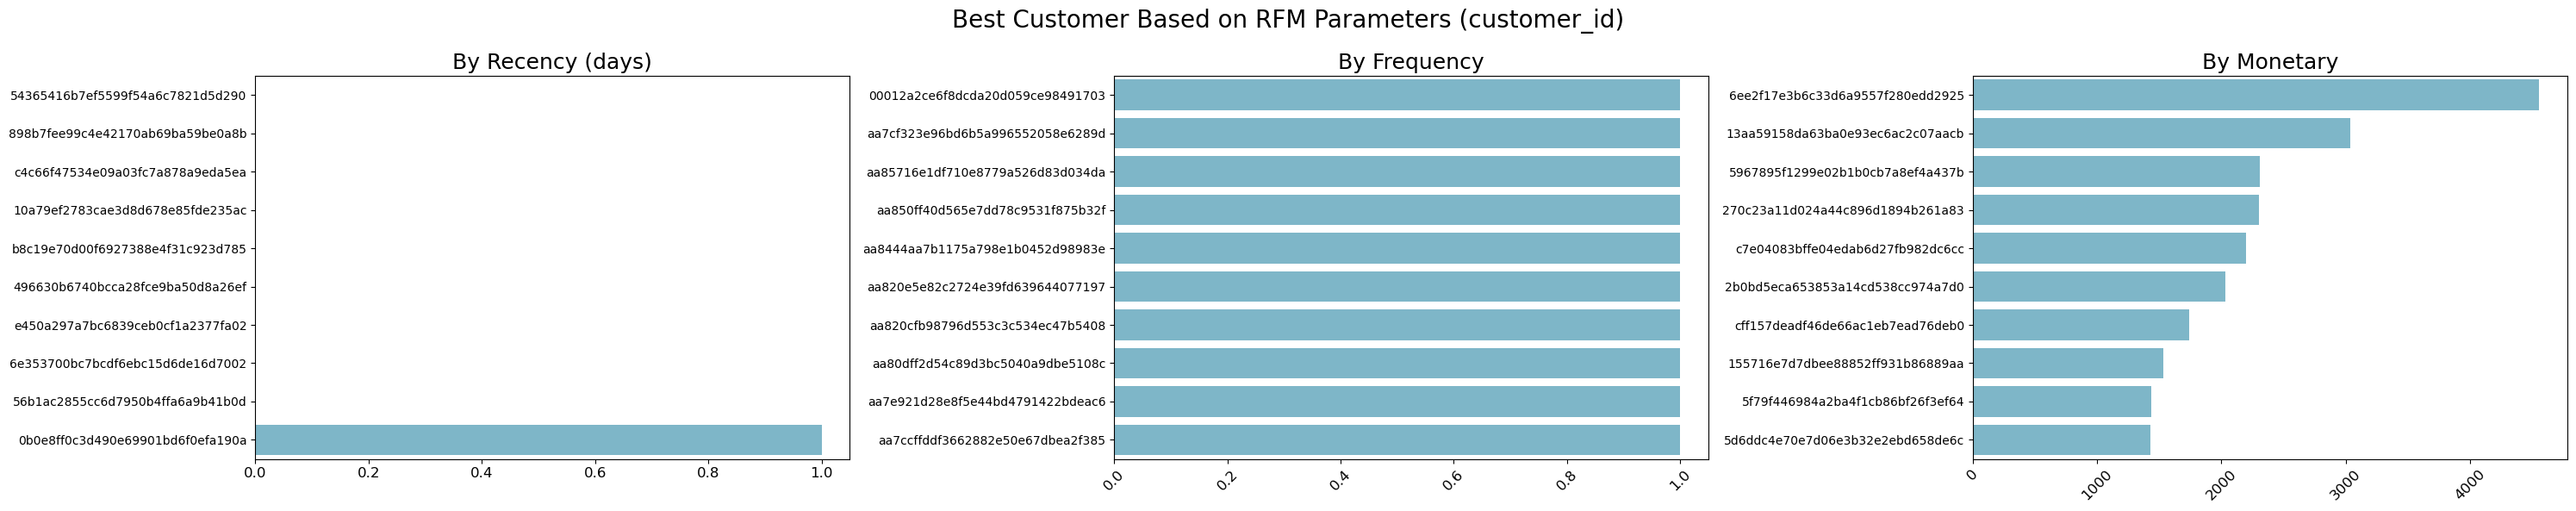

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ['#72BCD4', '#72BCD4', '#72BCD4', '#72BCD4', '#72BCD4']
 
sns.barplot(y='customer_id', x='recency_day', data=rfm_df.sort_values(by='recency_day', ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis ='x', labelsize=12)
 
sns.barplot(y='customer_id', x='frequency', data=rfm_df.sort_values(by='frequency', ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=12, rotation=45)
 
sns.barplot(y='customer_id', x='monetary', data=rfm_df.sort_values(by='monetary', ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=12, rotation=45)

plt.tight_layout()
plt.suptitle('Best Customer Based on RFM Parameters (customer_id)', fontsize=20)
plt.subplots_adjust(top=0.85)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Tren penjualan dan pendapatan mengalami kenaikan dari waktu ke waku secara signifikan
- Conclution pertanyaan 2 : Tipe pembayaran yang paling sering dipakai adalah Credit Card, oleh karena itu berikan kemudahan pembayaran pada metode tersebut agar tetap menjaga customer
- Conclution pertanyaan 3 : Kota dengan customer terbanyak adalah Sao Paulo, oleh karena itu kurangi promosi/stan pada kota tersebut dan fokus pada kota yang sepi customer
- Conclution pertanyaan 4 : 9 pelanggan baru saja melakukan transaksi di hari yang sama, sehingga 0 days recency
- Conclution pertanyaan 5 : Semua pelanggan berbeda-beda dan mereka memesan tidak lebih dari 1 kali
- Conclution pertanyaan 6 : Rata-rata pengeluaran customer dalam beberapa bulan terakhir adalah sebesar BRL90,10